<a href="https://colab.research.google.com/github/MuhammadMirafuddin17/PRIVATE/blob/main/TestingNaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from joblib import load
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
model = load('naive_bayes_model.joblib')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv').squeeze()

In [3]:
y_pred = model.predict(X_test)

In [4]:
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.8073846153846154

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.84       843
           1       0.91      0.66      0.77       782

    accuracy                           0.81      1625
   macro avg       0.83      0.80      0.80      1625
weighted avg       0.83      0.81      0.80      1625



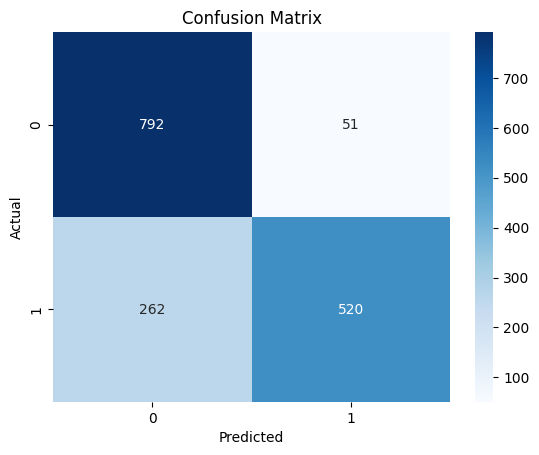

In [5]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()